<center><span style="font-family:Comic Sans MS; color:navy "><h1> Cats🙀 Vs Dogs🐶  Classification(Keras API) </h1></span></center>

# <b>1 <span style='color:#94D4F6'>|</span> Import Libraries</b>

In [1]:
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.image import imread
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation , Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tqdm
import shutil

In [2]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU Avilibale: ", len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True) 

Num GPU Avilibale:  1


# <b>2 <span style='color:#94D4F6'>|</span> Generate the datasets</b>

In [3]:
zip_ref = zipfile.ZipFile('../input/dogs-vs-cats/train.zip','r')
zip_ref.extractall("../tmp/dogs-vs-cats")
zip_ref.close()

In [4]:
base = '../tmp/dogs-vs-cats'
train = os.path.join(base,'train')

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.1 |</span></b> Visualize some images</b></p></div>

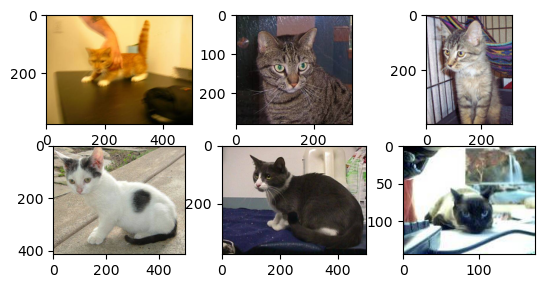

In [5]:
folder = train + '/' # Define the location
for i in range(6):
    plt.subplot(330 + 1 + i) # Define the subplot
    filename = folder + 'cat.' + str(i) + '.jpg' # get the filename
    image = imread(filename) # image pixels
    plt.imshow(image) # plot the row pixel data
folder = train + '/' # Define the location

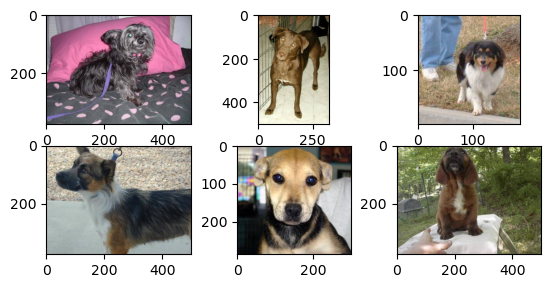

In [6]:
for i in range(6):
    plt.subplot(330 + 1 + i) # Define the subplot
    filename = folder + 'dog.' + str(i) + '.jpg' # get the filename
    image = imread(filename) # image pixels
    plt.imshow(image) # plot the row pixel data

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.2 |</span></b> Total image</b></p></div>

In [7]:
all_train = os.listdir(train + '/')
print('Num of images:', len(all_train))

Num of images: 25000


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.3 |</span></b> Split training set</b></p></div>

In [8]:
dog_file = [i for i in all_train if i.startswith('dog')]
cat_file = [i for i in all_train if i.startswith('cat')]
data = train_test_split(dog_file,cat_file,test_size = 0.1,shuffle = True,random_state = 42)
train_dog,valid_dog,train_cat,valid_cat = [x for x in data]

train_dog_total,valid_dog_total,train_cat_total,valid_cat_total = [len(x) for x in data] 
print("All train data: " + str(train_dog_total + train_cat_total))
print("All valid data: " + str(valid_dog_total + valid_cat_total))

All train data: 22500
All valid data: 2500


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.4 |</span></b> Manage Dataset</b></p></div>

In [9]:
train_dog_dir = train + '/dog'
train_cat_dir = train + '/cat'
valid = base + '/valid'
valid_dog_dir = valid + '/dog'
valid_cat_dir = valid + '/cat'

make_dirs = [train_dog_dir, valid_dog_dir, train_cat_dir, valid_cat_dir]
for dir, x in zip(make_dirs, data):
    os.makedirs(dir, exist_ok=True)
    for i in tqdm.tqdm(x):
        shutil.move(os.path.join(train, i), dir)
    print('elements in {}: {}'.format(dir, len(os.listdir(dir))))

100%|██████████| 11250/11250 [00:00<00:00, 14255.38it/s]


elements in ../tmp/dogs-vs-cats/train/dog: 11250


100%|██████████| 1250/1250 [00:00<00:00, 17688.59it/s]


elements in ../tmp/dogs-vs-cats/valid/dog: 1250


100%|██████████| 11250/11250 [00:00<00:00, 17402.65it/s]


elements in ../tmp/dogs-vs-cats/train/cat: 11250


100%|██████████| 1250/1250 [00:00<00:00, 18303.27it/s]

elements in ../tmp/dogs-vs-cats/valid/cat: 1250


<span style='font-family:comic Sans MS; color:navy'>If we check the Training directory: </span>

In [10]:
!ls ../tmp/dogs-vs-cats/train

cat  dog


# <b>3 <span style='color:#94D4F6'>|</span> Preprocessing </b>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>3.1 |</span></b> Rescaled images</b></p></div>

In [11]:
target_size = (150,150)
batch_size = 20
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(train,target_size=target_size,batch_size=batch_size,class_mode = "binary")
valid = valid_gen.flow_from_directory(valid,target_size=target_size,batch_size=batch_size,class_mode = "binary")

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# <b>4 <span style='color:#94D4F6'>|</span> Build a model </b>

In [12]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape =(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>4.1 |</span></b> Compile Model</b></p></div>

In [14]:
model.compile(loss = 'binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'] )

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>4.2 |</span></b> Create a Checkpoint</b></p></div>

In [15]:
checkpointer = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True, mode="max",patience = 10),
                tf.keras.callbacks.ModelCheckpoint(
                    filepath='/kaggle/working/model-{epoch}.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    mode="max")]

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>4.3 |</span></b> Fit Data</b></p></div>

In [16]:
Model = model.fit(train,steps_per_epoch=100, epochs=50, validation_data=valid, validation_steps=50,
                    verbose=1, callbacks=[checkpointer])

Epoch 1/50
 99/100 [============================>.] - ETA: 0s - loss: 1.0357 - accuracy: 0.4985
Epoch 1: saving model to /kaggle/working/model-1.hdf5
100/100 [==============================] - 14s 63ms/step - loss: 1.0324 - accuracy: 0.4975 - val_loss: 0.6934 - val_accuracy: 0.4930
Epoch 2/50
 99/100 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5328
Epoch 2: saving model to /kaggle/working/model-2.hdf5
100/100 [==============================] - 5s 48ms/step - loss: 0.6916 - accuracy: 0.5320 - val_loss: 0.6913 - val_accuracy: 0.5080
Epoch 3/50
 99/100 [============================>.] - ETA: 0s - loss: 0.7247 - accuracy: 0.5217
Epoch 3: saving model to /kaggle/working/model-3.hdf5
100/100 [==============================] - 6s 62ms/step - loss: 0.7243 - accuracy: 0.5215 - val_loss: 0.6859 - val_accuracy: 0.5590
Epoch 4/50
 99/100 [============================>.] - ETA: 0s - loss: 0.6854 - accuracy: 0.5556
Epoch 4: saving model to /kaggle/working/model-4.hdf5
100

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>4.4 |</span></b> Training and Validation Accuracy </b></p></div>

In [17]:
accuracy = Model.history['accuracy']
val_acc = Model.history['val_accuracy']
loss = Model.history['loss']
val_loss = Model.history['val_loss']
epochs = range(len(accuracy))

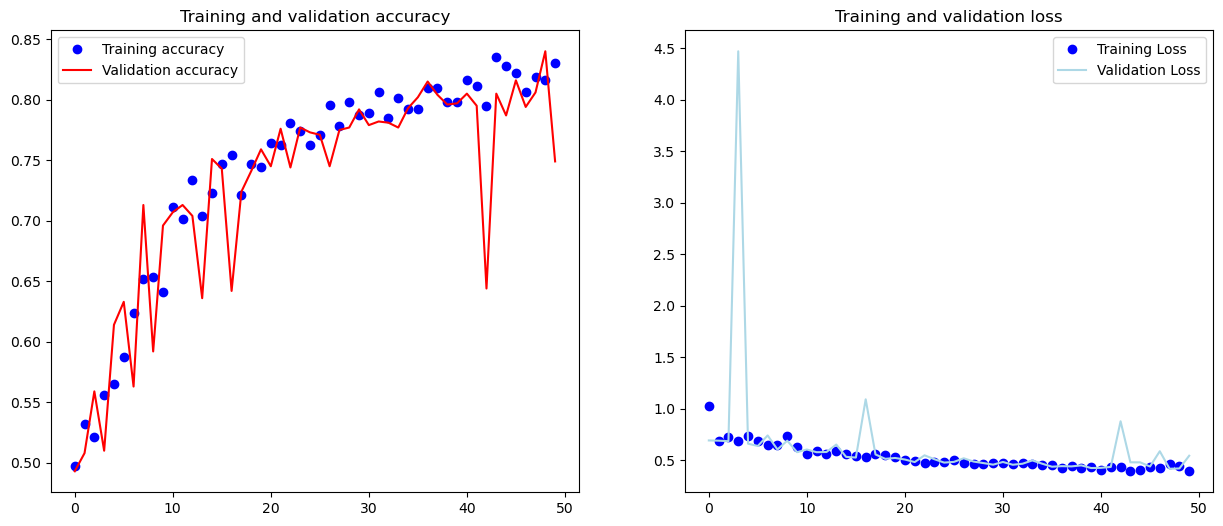

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Plot Training accuracy on the first subplot
axes[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
axes[0].set_title('Training and validation accuracy')

# Plot Training Loss on the second subplot
axes[1].plot(epochs, loss ,'bo', label='Training Loss')
axes[1].plot(epochs,val_loss ,label='Validation Loss',color = 'lightblue')
axes[1].set_title('Training and validation loss')
for ax in axes:
    ax.legend()
plt.show()